**Download DataSet**

In [1]:
# dataset path from kggle
!kaggle datasets download gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.13G/2.13G [00:10<00:00, 227MB/s]
100% 2.13G/2.13G [00:10<00:00, 214MB/s]


In [2]:
# unzip file
!unzip leapgestrecog.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflatin

**Import Libraries**

In [3]:
!pip install split-folders

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from google.colab import files
import splitfolders
import os
import shutil

**Rearrange data in sorted folders with renaming images**

In [5]:
source_dir = "/content/leapGestRecog"
target_dir = "/content/dataset_restructured"

# Create target folder
os.makedirs(target_dir, exist_ok=True)

for main_folder in os.listdir(source_dir):
    main_folder_path = os.path.join(source_dir, main_folder)

    if os.path.isdir(main_folder_path):

        for class_folder in os.listdir(main_folder_path):
            class_folder_path = os.path.join(main_folder_path, class_folder)

            if os.path.isdir(class_folder_path):
                target_class_path = os.path.join(target_dir, class_folder)
                os.makedirs(target_class_path, exist_ok=True)

                for image in os.listdir(class_folder_path):
                    src_image_path = os.path.join(class_folder_path, image)

                    if os.path.isfile(src_image_path):
                        dest_image_path = os.path.join(target_class_path, f"{main_folder}_{image}")
                        shutil.copy(src_image_path, dest_image_path)

print("✅ The data has been rearranged successfully")

✅ The data has been rearranged successfully


**Manually split data into [Train, Test, Valid]**

In [6]:
input_folder  = '/content/dataset_restructured'  # Original data path
output_folder = '/content/dataset'                  # Split data path

# Split data (80% train, 10% test, 10% valid)
splitfolders.ratio(input=input_folder, output=output_folder, seed=42, ratio=(0.8, 0.1, 0.1), group_prefix=None)

Copying files: 20000 files [00:04, 4200.72 files/s]


**Data preparation**

In [7]:
train_datagen    = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Dataset paths
train_path = '/content/dataset/train'
test_path  = '/content/dataset/test'
val_path   = '/content/dataset/val'

In [9]:
# Read Data
train_data = train_datagen.flow_from_directory(train_path, target_size=(64, 64), batch_size=32, class_mode='categorical')
test_data  = val_test_datagen.flow_from_directory(test_path, target_size=(64, 64), batch_size=32, class_mode='categorical')
val_data   = val_test_datagen.flow_from_directory(val_path, target_size=(64, 64), batch_size=32, class_mode='categorical')

Found 16000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [10]:
print(train_data.class_indices)

{'01_palm': 0, '02_l': 1, '03_fist': 2, '04_fist_moved': 3, '05_thumb': 4, '06_index': 5, '07_ok': 6, '08_palm_moved': 7, '09_c': 8, '10_down': 9}


**Build CNN model**

In [20]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu',input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),

    Dropout(0.5),

    Dense(train_data.num_classes, activation='softmax')
])

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, steps_per_epoch=train_data.samples // train_data.batch_size, epochs=10,
                    validation_data=val_data, validation_steps=val_data.samples // val_data.batch_size)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 58s 109ms/step - accuracy: 0.5468 - loss: 1.2758 - val_accuracy: 0.9899 - val_loss: 0.0410
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 109ms/step - accuracy: 0.9483 - loss: 0.1610 - val_accuracy: 0.9945 - val_loss: 0.0222
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - accuracy: 0.9740 - loss: 0.0782 - val_accuracy: 0.9980 - val_loss: 0.0073
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.9792 - loss: 0.0625 - val_accuracy: 0.9985 - val_loss: 0.0060
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - accuracy: 0.9830 - loss: 0.0506 - val_accuracy: 0.9980 - val_loss: 0.0076
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.9870 - loss: 0.0327 - val_accuracy: 0.9980 - val_loss: 0.0072
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 110ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9985 - val_loss: 0.0038
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9900 - loss: 0

In [22]:
# Evaluate the model
loss, accuracy_test = model.evaluate(test_data)
print(f'Accuracy: {accuracy_test * 100:.2f}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9959 - loss: 0.0321
Accuracy: 99.75%


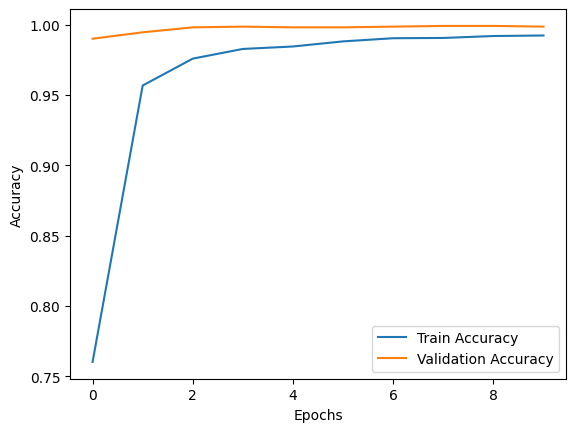

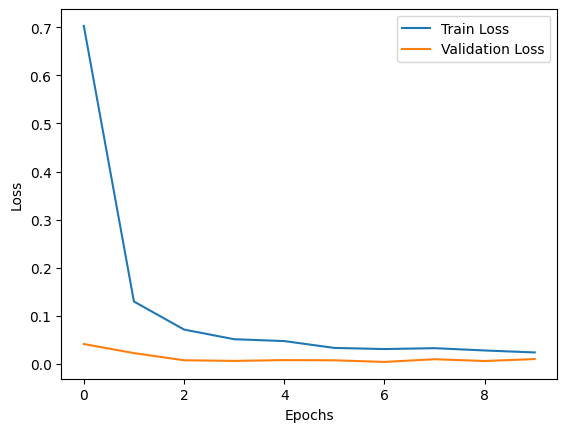

In [25]:
# Drawing Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Drawing Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Save model**

In [26]:
model.save('model.h5')
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>